In [ ]:
# Modules import
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Functions to generate data and return the value of the estimator
def generate_data(n, mean, std):
    data = np.random.normal(mean, std, n)
    return np.mean(data)

In [3]:
# Parameters
repetitions = 1000
n = 10000
mean = 2
std = 3

empiric_means = [generate_data(n, mean, std) for _ in range(repetitions)]
print("Empiric mean of the estimator: ", np.mean(empiric_means), "Empiric variance of the estimator: ", np.var(empiric_means))
# The variance should be close to std^2/n

Empiric mean of the estimator:  1.9999922263044898 Empiric variance of the estimator:  0.0007752349059618936


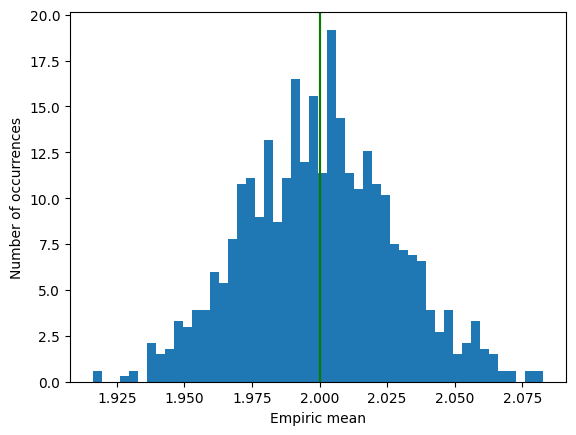

In [4]:
# 3. Plot histogram
plt.hist(empiric_means, bins=50, density=True)
plt.xlabel('Empiric mean')
plt.ylabel('Number of occurrences')

plt.axvline(x=mean, color='r')
plt.axvline(x=np.mean(empiric_means), color='g');

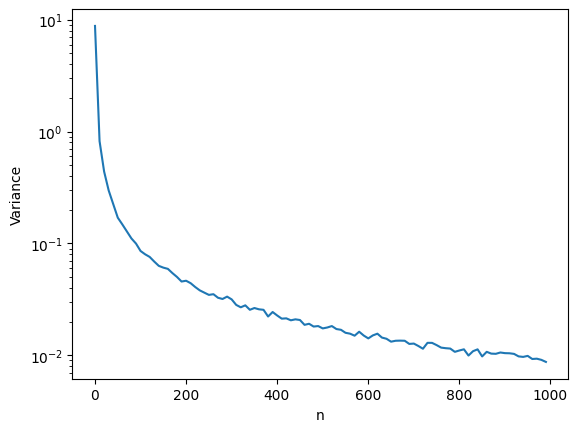

In [5]:
# 4. Plot variance as a function of n
x = range(1, 1000, 10)
repetitions = 1000
variances = []
for n in x:
    empiric_means = [generate_data(n, mean, std) for _ in range(repetitions)]
    variances.append(np.var(empiric_means))
# Make the y axis logarithmic
plt.figure()
plt.yscale('log')
plt.xlabel('n')
plt.ylabel('Variance')
plt.plot(x, variances);

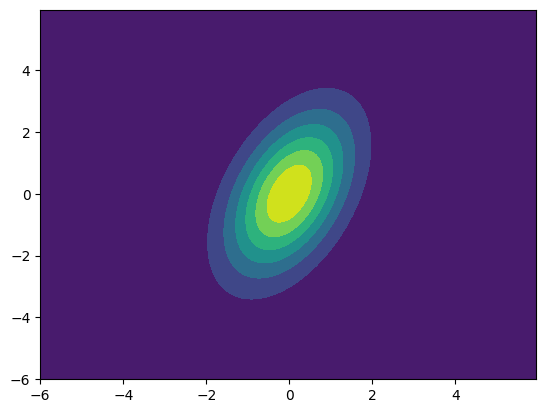

In [6]:
# Unrelated to this exercise: Plotting a bivariate normal distribution (slide 70 of Chapter 2)
# Code adapted from https://stackoverflow.com/questions/54513638/try-3d-plotting-probability-density-function-for-multivariate-normal-distributio
from scipy.stats import multivariate_normal

mean = [0, 0]
sigma = [[1, .8], [.8, 3]]
dist = multivariate_normal(mean, cov=sigma)

x, y = np.mgrid[-6:6:.05, -6:6:.05]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y

z = dist.pdf(pos)

plt.contourf(x,y,z)
plt.show()